In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [11]:
What_country = 'United States'
df_DA_IN = df[((df['job_country']== What_country))].copy()
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])
df_DA_IN =  df_DA_IN.explode('job_skills')
df_DA_IN[['salary_year_avg','job_skills']]


,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
100,228222.0,sql
100,228222.0,r
100,228222.0,python
...,...,...
785648,221875.0,snowflake
785648,221875.0,spark
785692,157500.0,python
785692,157500.0,matlab


In [16]:
df_high_paid =df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
df_high_paid

,count,median
job_skills,,
haskell,1,213000.00000
ruby on rails,10,187750.00000
ringcentral,2,182500.00000
solidity,6,177000.00000
elixir,2,175610.34375
mongo,188,173500.00000
dplyr,15,167500.00000
vue,8,167423.50000
unreal,8,166183.50000


In [22]:
df_high_demand =df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_high_demand

,count,median
job_skills,,
spark,2570,142500.0
aws,3294,136400.0
azure,2280,128025.0
python,9195,128000.0
r,4127,122165.5
sql,9574,120000.0
tableau,3751,114000.0
sas,2634,110000.0
power bi,1947,102500.0


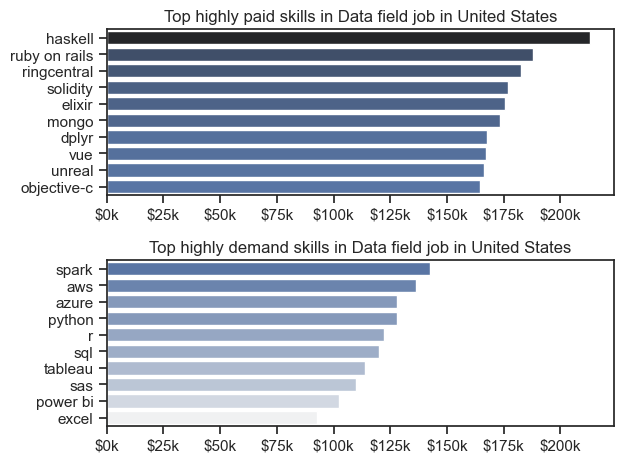

In [36]:
fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_high_paid, x='median',y=df_high_paid.index , ax=ax[0],hue='median', palette='dark:b_r',legend=False)
ax[0].set_title(f'Top highly paid skills in Data field job in {What_country}' )
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.barplot(data=df_high_demand, x='median',y=df_high_demand.index , ax=ax[1],hue='median', palette='light:b',legend=False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
ax[1].set_title(f'Top highly demand skills in Data field job in {What_country}' )
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('')
fig.tight_layout()